In [41]:
install.packages("ROCR")
library(ROCR)

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\marc_\AppData\Local\Temp\RtmpofzbIt\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 3.6.3"

# Área bajo la curva ROC

## Definición 
Teoricamente es una representación gráfica de la sensibilidad (e.g.  caracteriza la capacidad de la prueba para detectar la enfermedad en sujetos enfermos.) frente a la especificidad (e.g. la especificidad caracteriza la capacidad de la prueba para detectar la ausencia de la enfermedad en sujetos sanos.) para un sistema clasificador binario según se varía el umbral de discriminación. Otra interpretación de este gráfico es la representación de la razón o proporción de verdaderos positivos (VPR = Razón de Verdaderos Positivos) frente a la razón o proporción de falsos positivos (FPR = Razón de Falsos Positivos) también según se varía el umbral de discriminación (valor a partir del cual decidimos que un caso es un positivo).

El análisis de la curva ROC proporciona herramientas para seleccionar los modelos posiblemente óptimos y descartar modelos subóptimos independientemente de el coste de la distribución de las dos clases sobre las que se decide. La curva ROC es también independiente de la distribución de las clases en la población. El análisis ROC se relaciona de forma directa y natural con el análisis de coste/beneficio en toma de decisiones diagnósticas.

## Principios de funcionamiento 

Para empezar a construir la "curva ROC" primero necesitaremos de un clasificador que clasifique entre positivos y negativos respecto a un valor umbral o punto de corte (c).

Ejmeplo:

> Positivo --> y = 1 si x >= c 

> Negativo --> y = 0 si x < c

Si como ejemplo cogemos una muestra de población en la que hay gente enfema y sana. Aplicamos nuestra prueba/modelo a sanos y enfermos. Dicha prueba nos dividirá a la población en cuatro subgrupos (Verdadero positivo VP, Falso positivo FP, Falso negativo FN y Verdadero negativo VN) dependiendo de nuestro punto de corte "c". Una vez cuantificados los resultados de las divisiones en grupos podremos calcular la sensibilidad y la especificidad (descritos anteriormente anteriormente).

Las medidas de sensibilidad y especificidad corresponden a una probabilidad a priori, es decir, dado el estado real de un individuo calculan la probabilidad de que este obtenga un resultado positivo o negativo en la prueba. Cuanto más cercanas a 1 sean éstas probabilidades, mejor capacidad discriminante tendrá nuestra variable de decisión.

La curva ROC representa especificidad frente a la sensibilidad para cada posible valor umbral o punto de corte en la escala de resultados de la prueba en estudio. 

Si calculamos el valor del área de esta represetnación (Área bajo la curva ROC) es el estadístico por excelencia para medir la capacidad discriminante de la prueba. También para comparar pruebas entre sí y determinar cual és la más eficaz. Su rango de valores va desde 0, 5, siendo este valor el correspondiente a una prueba sin capacidad discriminante, hasta 1, que es cuando los dos grupos están perfectamente diferenciados por la prueba. Por tanto, podemos decir que cuanto
mayor sea el AUC mejor será la prueba.

Basándonos en la definición dada de área bajo la curva, una primera forma de calcularla sería representando la curva ROC, o una estimación de ella, y obtener el porcentaje de área del cuadrado que encierra bajo ella. No siempre será necesario tener la curva para obtener este área, sino, que a partir de los datos podremos estimarla directamente.

Podemos calcular el Área bajo la curva con los siguientes métodos (No paramétricos y paramétricos).

- Parametrico: el método paramétrico trata de averiguar la distribución de la variable de decisión o variable respuesta de la prueba


- No paramétrico: el método no paramétrico para la construcción de la curva ROC no hace suposición alguna sobre la distribución de los resultados de la prueba en ambos grupos

#### No paramétricos

 Regla Trapezoidal: Si tenemos una curva de ROC en forma de escalera

 Estadístico suma de rangos de Wilcoxon: se estima a través del estadístico de wilcoxon

 Método de la función Kernel: Para las curvas ROC no paramétricas pero suavizadas mediante la función Kernel podemos calcular el área


#### Paramétricos o semiparamétricos

 Partiendo de que hemos supuesto una distribución y ajustado unos parámetros, cualquier área que calculemos mediante éstos métodos va a estar sujeta a un error. La forma de cuantificar este error es calculando un intervalo de confianza que se vea reducido si se ampliase la muestra. 

Seguidamente haremos un ejemplo sobr el Área bajo la curva ROC.

# Ejemplo de utilización en R

Primeramente creaermos un dataset que representa una población enferma y otra sana. Podemos hacer una muestra de 1000 sanos y 1000 enfermos o lo que queramos. También aplicamos un valor que podría ser un valor de muestreo teórico que determinará si un paciente esta enfermo o sano. Por ejemplo suponemos que el valor es la temperatura corporal. Podriamos clasificar en si tiene COVID o no o alguna infección. Como hacen actualmente que te miden la temperatura antes de entrar en la Salle. Por lo general la temperatura media de una persona sana oscila entre los 36.1 grados hasta los 37 grados. En cambio, para una persona con una infección se consideraría a partir de 38 grados o más.

In [76]:
# El código sirve para generar un conjunto aleatorio de 1000 personar con una efmermedad y otro de 1000 personas sanos.

enfermos <- rnorm( 1000, 39.5, 2 )
sanos <- rnorm( 1000, 36.65, 2 )
datos <- data.frame( c( enfermos, sanos ),
                     as.factor( rep( c("Si", "No" ), times = 1, each = 1000 ) ) )
colnames( datos ) <- c( "Temperatura", "Infeccion" )

head(datos)
tail(datos)

Temperatura,Infeccion
40.66531,Si
41.69231,Si
41.69145,Si
38.49676,Si
37.75474,Si
38.42931,Si


,Temperatura,Infeccion
1995,31.90834,No
1996,38.38642,No
1997,38.44963,No
1998,36.02084,No
1999,36.59368,No
2000,36.26427,No


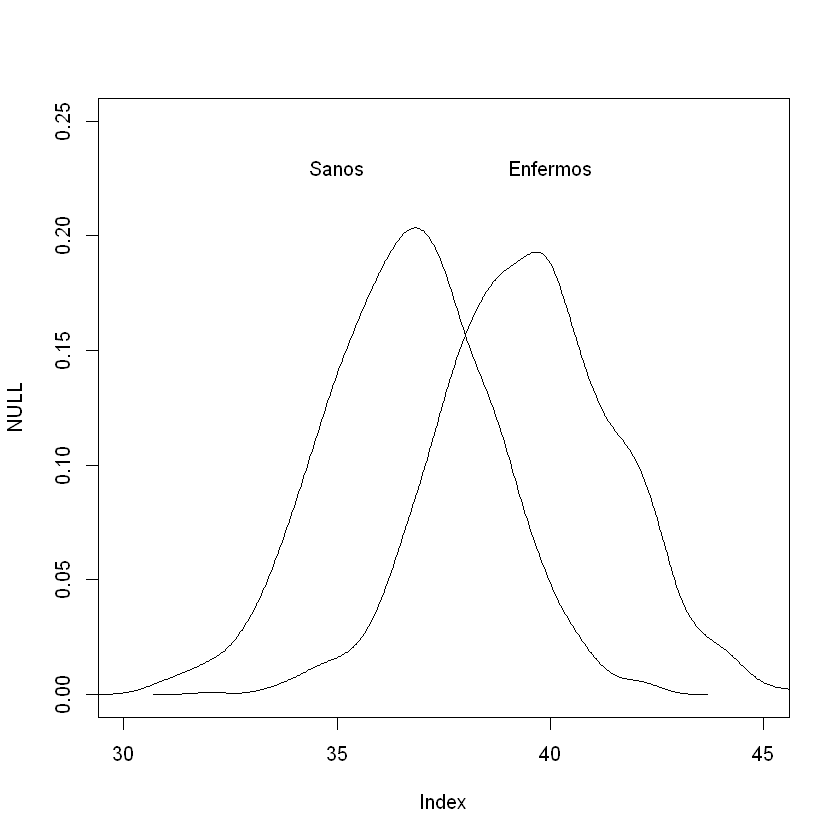

In [77]:
# Generamos el gráfico de densidad para ver la distribució de las 2 muestras
plot(NULL, xlim=c(30,45), ylim=c(0,0.25), type="n")
denEnf <- density(enfermos)
lines(denEnf)
denSan <- density(sanos)
lines(denSan)
text(35, 0.23, "Sanos")
text(40,0.23, "Enfermos")

Como podemos ver en el gráfico de las curvas de densidad generadas a partir de los datos, la distribución de sanos solapa con la de enfermos. Es precisamente debido a ese solapamiento por lo que se hace necesario recurrir a algún tipo de herramienta predictiva que ayude a decidir sobre los casos dudosos.

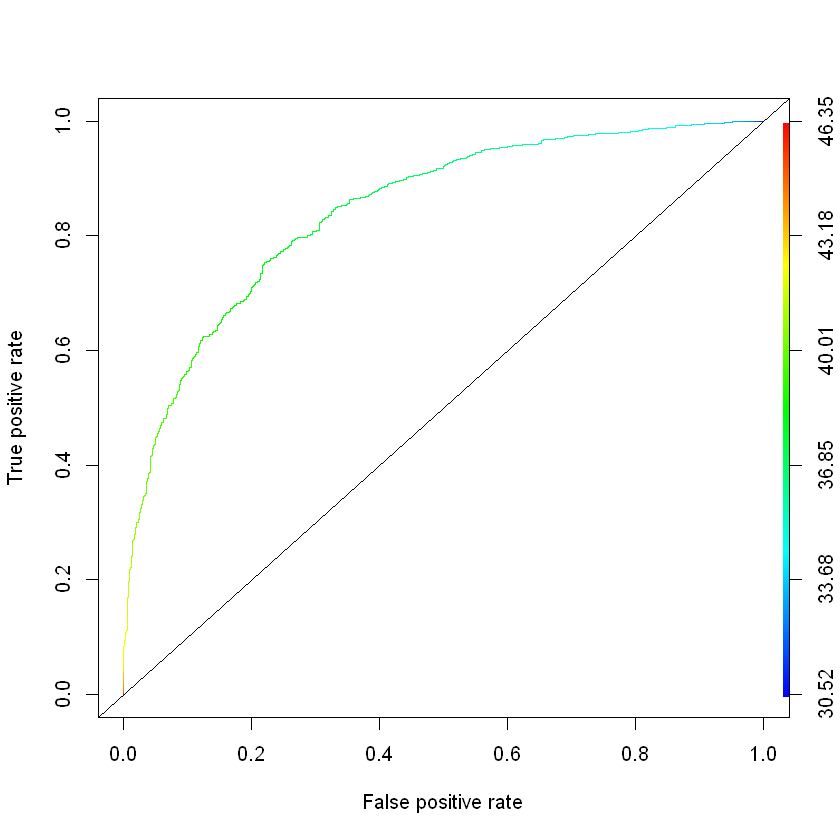

In [78]:
pred <- prediction( datos$Temperatura, datos$Infeccion )
perf <- performance(pred, measure = "tpr", x.measure = "fpr" )

plot(perf, colorize = TRUE, type = "l" ) 
abline(a = 0, b = 1 )

La curva ROC que se genera tiene los siguientes elementos:

- Eje de abscisas (x): Ratio de falsos positivos o 1−especificidad

- Eje de ordenadas (y): Ratio de verdaderos positivos o sensibilidad

- Diagonal del gráfico: Marca divide la cuadrícula en dos mitades. Indica el 50 del área del gráfico

In [79]:
# Calcular el área bajo la curva
AUC <- performance( pred, measure = "auc")
AUCaltura <- AUC@y.values
AUCaltura

[[1]]
[1] 0.845

In [80]:
# Calcular el punto de corte óptimo
cost.perf <- performance( pred, measure = "cost" )
puntoCorte <- pred@cutoffs[[1]][which.min(cost.perf@y.values[[1]])]

puntoCorte

[1] 38.16358

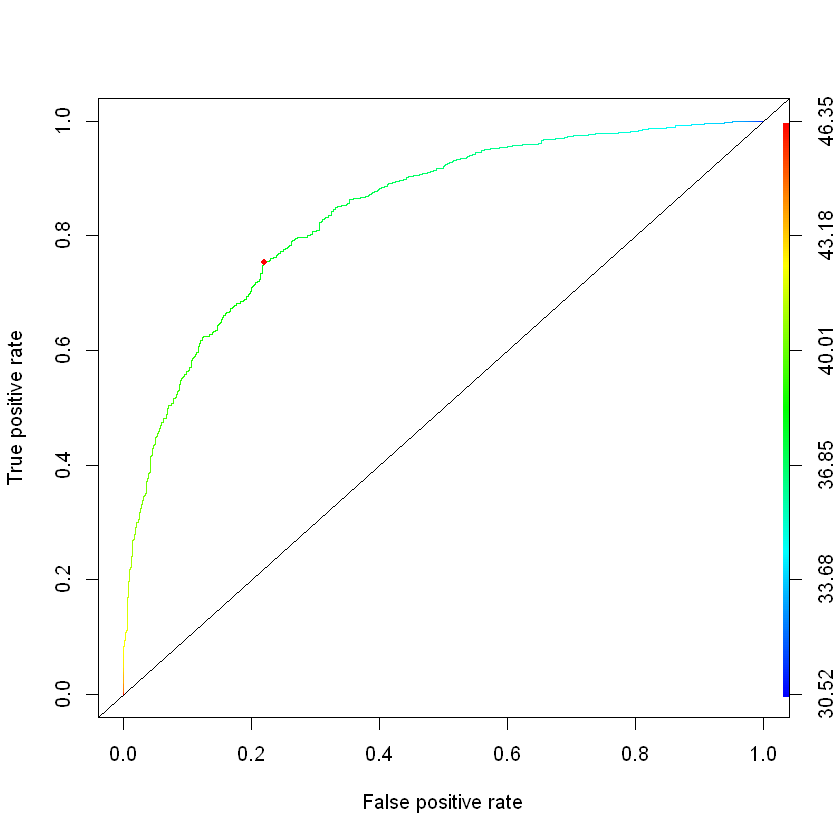

In [81]:
plot(perf, colorize = TRUE, type = "l" ) 
abline(a = 0, b = 1 )

# Coordenadas del punto de corte óptimo
x<-perf@x.values[[1]][which.min( cost.perf@y.values[[1]] ) ]
y<-perf@y.values[[1]][which.min( cost.perf@y.values[[1]] ) ]
points(x,y, pch=20, col="red")

Utilizando el método del Área bajo la curva de ROC podemos crear un modelo de clasificación sencillo en el cual se escoge un método de corte óptimo. Claro esta que el data set utilizado solo depende de una variable en este caso. También muestra que en este caso el modelo es bastante sólido, ya que el valor de el área ROC es cercano a 1. El modelo da la información de que si alguien esta por encima de 38.16 tendrá una infección, en el caso de la Salle no podría entrar en el recinto universitario.

Parte de la información descrita sobre el Área bajo la curva ROC ha sido extraída del trabajo final de grado en matemáticas de Ana Rocío del Valle. Aqui adjunto link:
https://idus.us.es/bitstream/handle/11441/63201/Valle%20Benavides%20Ana%20Roc%C3%ADo%20del%20TFG.pdf?sequence=1